In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [22]:
npy_path = 'data/0000000080_rgb_downsampled_disp.npy'
img_path = 'data/0000000080_rgb_downsampled_disp.jpeg'

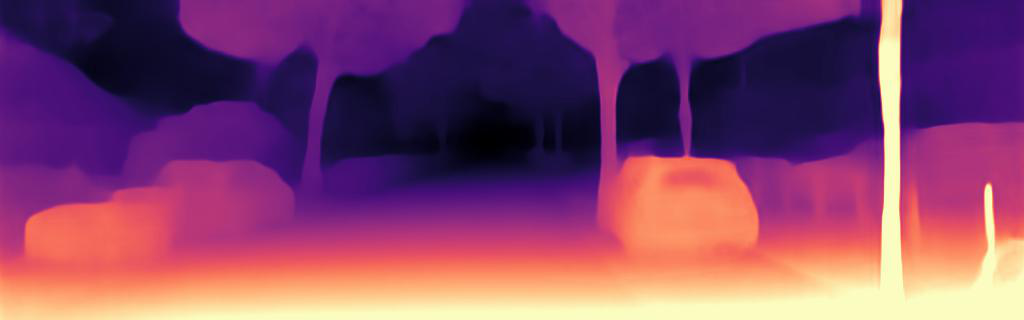

In [23]:
depth_map = Image.open(img_path)
depth_map

In [24]:
depth_map = np.load(npy_path)[0][0]
depth_map.shape

(320, 1024)

In [25]:
camera_matrix = np.array([[882.61644117,   0.,         621.63358525],
                          [  0.,         882.61644117, 524.38397862],
                          [  0.,           0.,           1.        ]])

camera_matrix = camera_matrix / 4.0

In [26]:
# camera_matrix = np.array([[9.842439e+02, 0.000000e+00, 6.900000e+02],
#                           [0.000000e+00, 9.808141e+02, 2.331966e+02],
#                           [0.000000e+00, 0.000000e+00, 1.000000e+00]])

camera_matrix = np.array([[9.037596e+02, 0.000000e+00, 6.957519e+02],
                          [0.000000e+00, 9.019653e+02, 2.242509e+02],
                          [0.000000e+00, 0.000000e+00, 1.000000e+00]])

camera_matrix = camera_matrix * (1024/1320)

f_x = camera_matrix[0][0]
f_y = camera_matrix[1][1]
c_x = camera_matrix[0][2]
c_y = camera_matrix[1][2]

f_x, f_y, c_x, c_y

(701.0983563636363, 699.7064145454545, 539.7348072727273, 173.96433454545453)

In [27]:
θ_x = 2 * np.arctan(512/f_x)
θ_y = 2 * np.arctan(160/f_y)

α_x = (np.pi - θ_x)/2
α_y = (np.pi - θ_y)/2

In [28]:
point_cloud = []

k = 0
for i in range(depth_map.shape[0]):
    for j in range(depth_map.shape[1]):
        if k % 5 == 0:
            γ_x = α_x + (j * θ_x) / 1024
            γ_y = α_y + (i * θ_y) / 320
            z = depth_map[i][j]
            x = z / np.tan(γ_x)
            y = z / np.tan(γ_y)
            point_cloud.append([x, y, z])
        k += 1
        
point_cloud = np.array(point_cloud)
point_cloud

array([[ 0.10301091,  0.03225495,  0.14105621],
       [ 0.09190847,  0.0291539 ,  0.12749483],
       [ 0.08926357,  0.02868578,  0.12544763],
       ...,
       [-0.73381306, -0.23737608,  1.04483819],
       [-0.74670726, -0.23841112,  1.04939401],
       [-0.76635368, -0.24152061,  1.06308079]])

In [29]:
# point_cloud = []

# k = 0
# for i in range(depth_map.shape[0]):
#     for j in range(depth_map.shape[1]):
#         if k % 5 == 0:
#             z = depth_map[i][j]
#             x = ((c_x - j) * z) / f_x
#             y = ((c_y - i) * z) / f_y
#             point_cloud.append([x, y, z])
#         k += 1
        
# point_cloud = np.array(point_cloud)
# point_cloud

<IPython.core.display.Javascript object>


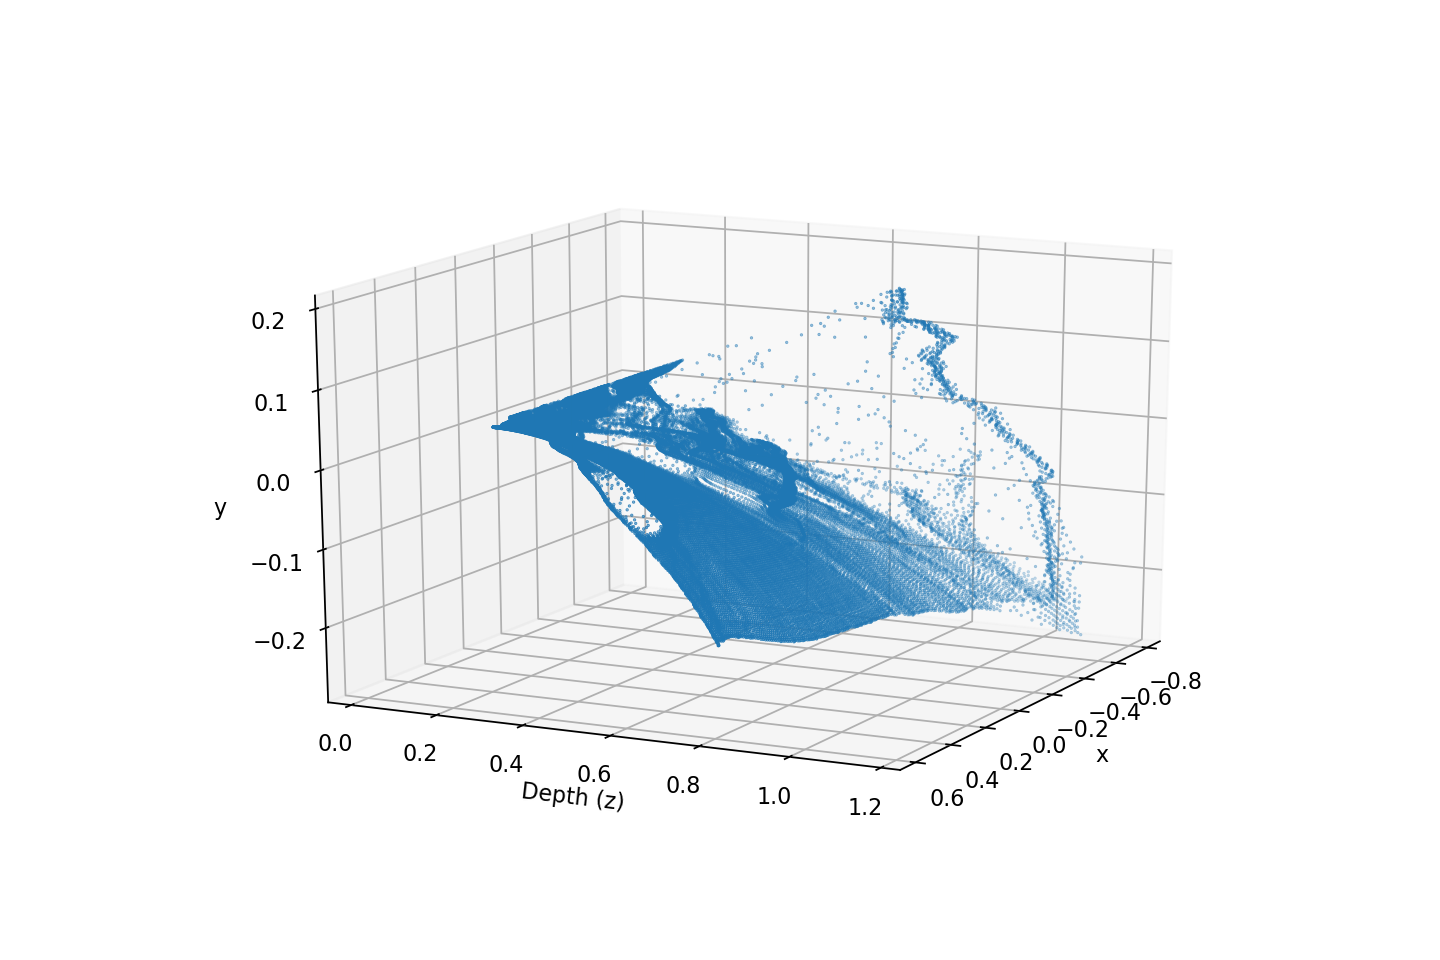

In [32]:
xs = point_cloud[:, 0]
ys = point_cloud[:, 1]
zs = point_cloud[:, 2]
size = [0.2]*len(xs)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('Depth (z)')
ax.set_zlabel('y')
ax.scatter(xs, zs, ys, cmap=cm.coolwarm, s=size)
# plt.scatter(xs, zs, cmap=cm.coolwarm, s=size)